<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
import sys
sys.path.append('../')
from src import soporte_nulos as sup_nul
from src import soporte_preprocesamiento as sup_prep

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

### Importamos los datos

In [2]:
df = pd.read_csv('datos/autorenew.csv')
df.sample()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
196644,2016-03-16 20:59:10,Volvo_V40_2.0T,private,offer,1800,control,combi,2000,manually,158.0,v40,150000,3,petrol,volvo,no,2016-03-16 00:00:00,0,22851,2016-04-07 08:46:30


### vemos los duplicados que tenemos

In [3]:
df.duplicated().sum()

4

### comprobamos cuales son los valores qeu tenemos duplicados

In [4]:
df_duplicados = df[df.duplicated(keep=False)]
df_duplicados

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
43501,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,private,offer,1999,control,combi,2001,manually,129.0,passat,150000,7,diesel,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15
92386,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,private,offer,1799,test,coupe,1999,automatic,190.0,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
95425,2016-03-28 00:56:10,Suzuki_Ignis,private,offer,1000,control,small car,2002,manually,82.0,andere,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,private,offer,1799,test,coupe,1999,automatic,190.0,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
196894,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,private,offer,4699,test,coupe,2003,automatic,215.0,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
242556,2016-03-28 00:56:10,Suzuki_Ignis,private,offer,1000,control,small car,2002,manually,82.0,andere,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,private,offer,4699,test,coupe,2003,automatic,215.0,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,private,offer,1999,control,combi,2001,manually,129.0,passat,150000,7,diesel,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


### parece que se trata de un 'error' a la hora de obtener los datos, asi que nos los quitamos

In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.duplicated().sum()

0

## Ahora hacemos una exploracion inicial

In [6]:
sup_prep.exploracion_datos(df)

El número de filas es 371524 y el número de columnas es 20

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


vehicleType          36.003865
gearbox               5.439487
model                 5.513507
fuelType              8.986230
notRepairedDamage    19.395786
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
price,371524.0,17295.302511,3.587973e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371524.0,2004.578033,9.286710e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,371524.0,113.967402,1.895175e+02,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,371524.0,125618.842928,4.011214e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371524.0,5.734451,3.712423e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371524.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371524.0,50820.494270,2.579909e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
dateCrawled,371524,280500,2016-03-24 14:49:47,7
name,371524,233531,Ford_Fiesta,657
seller,371524,2,private,371521
offerType,371524,2,offer,371512
abtest,371524,2,test,192583
vehicleType,237761,7,small car,80022
gearbox,351315,2,manually,274212
model,351040,251,golf,30070
fuelType,338138,7,petrol,223854
brand,371524,40,volkswagen,79639



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371524 entries, 0 to 371523
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371524 non-null  object 
 1   name                 371524 non-null  object 
 2   seller               371524 non-null  object 
 3   offerType            371524 non-null  object 
 4   price                371524 non-null  int64  
 5   abtest               371524 non-null  object 
 6   vehicleType          237761 non-null  object 
 7   yearOfRegistration   371524 non-null  int64  
 8   gearbox              351315 non-null  object 
 9   powerCV              371524 non-null  float64
 10  model                351040 non-null  object 
 11  kilometer            371524 non-null  int64  
 12  monthOfRegistration  371524 non-null  int64  
 13  fuelType             338138 non-null  object 
 14  bran

None

In [7]:
visualizador = sup_prep.Visualizador(df)

## Representamos nuestras varibales categoricas

## Representamos nuestras varibales numericas

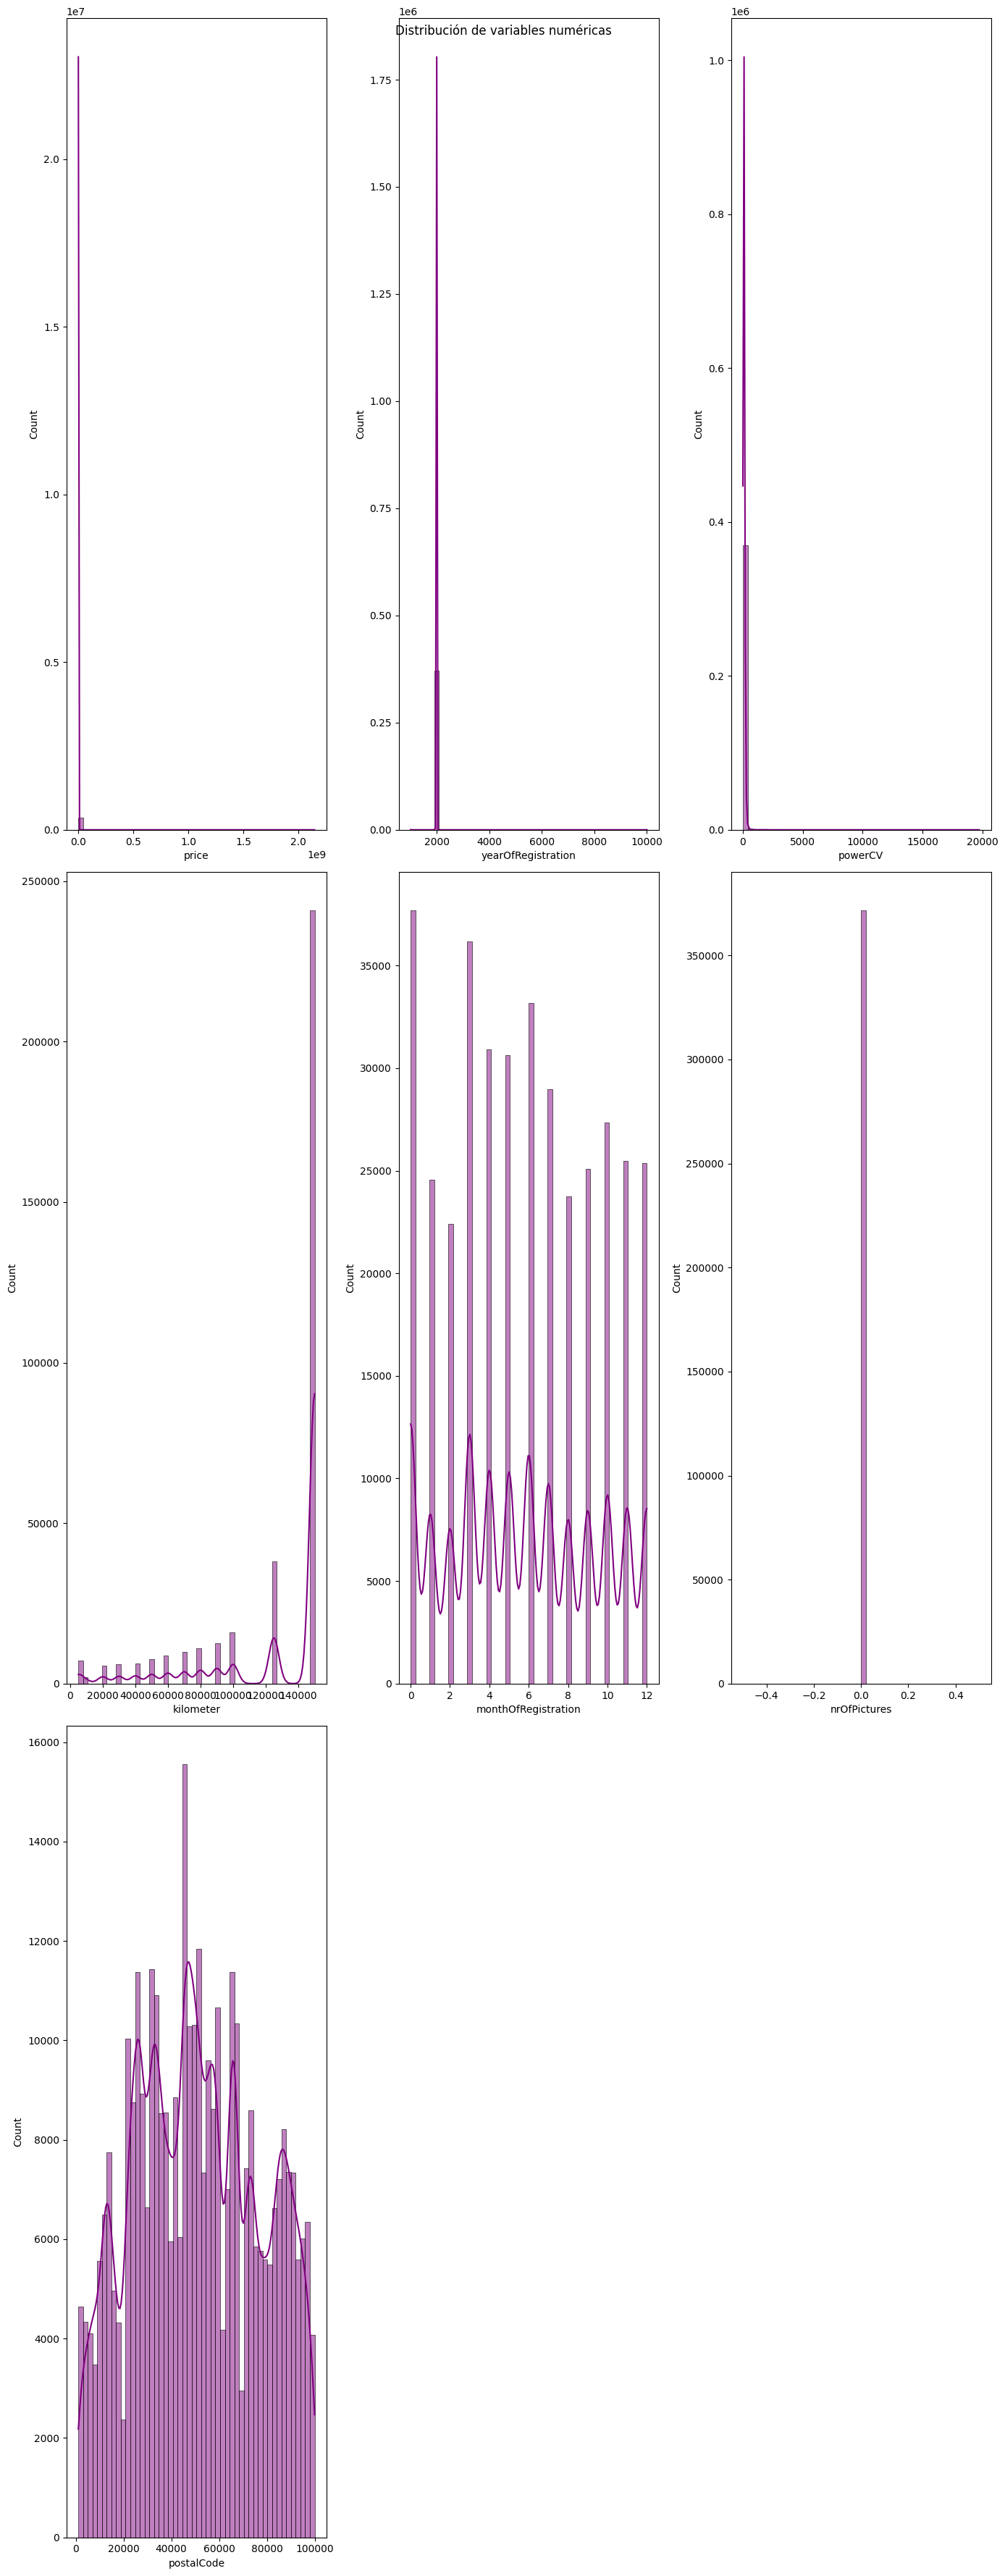

In [8]:
visualizador.plot_numericas(tamano_grafica=(14,12), color='purple')

#### Vemos que tenemos elementos como el numero de fotos que está a cero (cosa que también veíamos en el describe) y aunque se ve un poco mal en las graficas, podemos apreciar que tenemos bastantes outlayers.

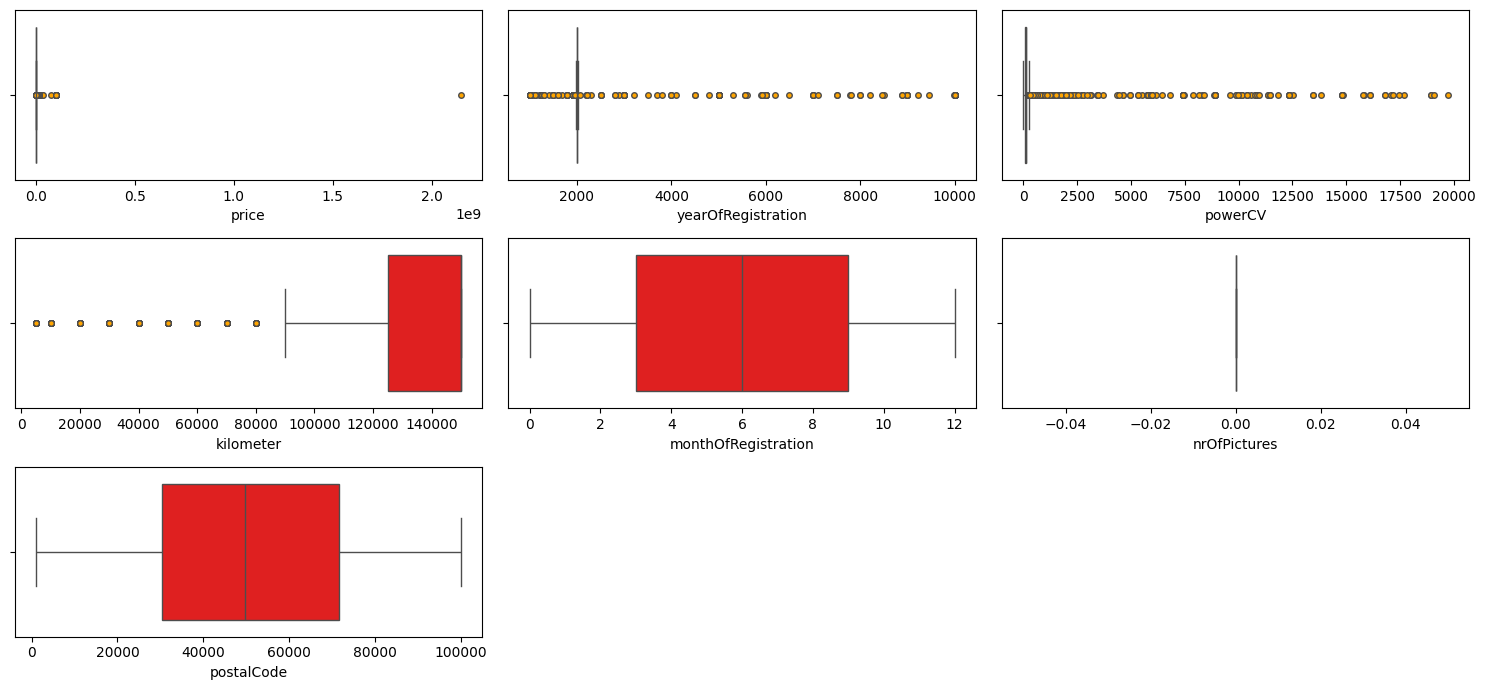

In [9]:
visualizador.deteccion_outliers(color='red', tamanio=(15,7))

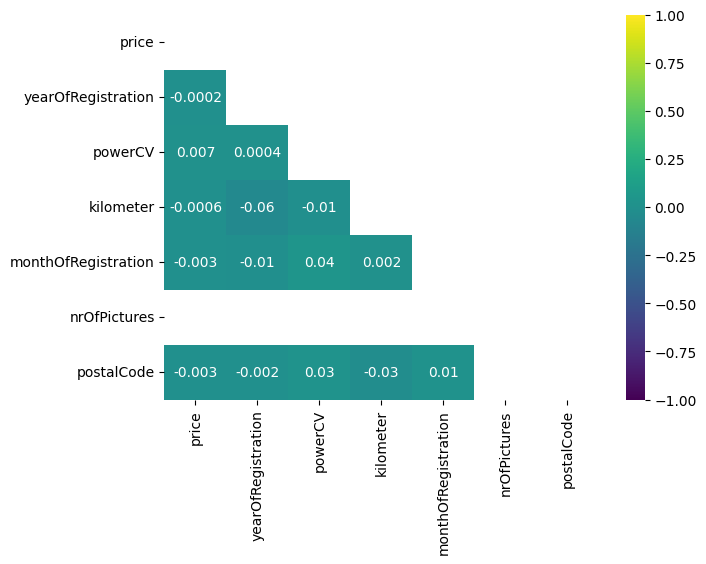

In [10]:
visualizador.correlacion()

### procedemos a eliminar la columna `nrOfPictures` ya que siempre es 0

In [11]:
df['nrOfPictures'].value_counts()

nrOfPictures
0    371524
Name: count, dtype: int64

In [12]:
df.drop(columns=['nrOfPictures'], inplace=True)

## Analizar las variables numericas

In [13]:
df_numericas = df.select_dtypes(np.number)
df_numericas.sample(2)

,price,yearOfRegistration,powerCV,kilometer,monthOfRegistration,postalCode
38483,1100,1997,123.0,150000,6,76476
15595,13890,2014,89.0,40000,6,23816


### Como precio es nuestra variable dependiente, no la vamos a tocar.

### Analizamos ```yearOfRegistration```

<Axes: xlabel='yearOfRegistration'>

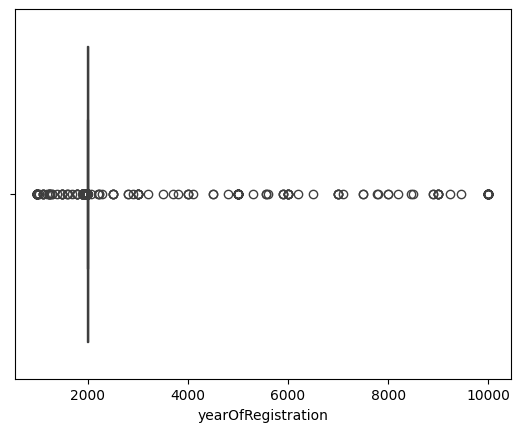

In [14]:
sns.boxplot(x=df['yearOfRegistration'])

In [15]:
df['yearOfRegistration'].describe()

count    371524.000000
mean       2004.578033
std          92.867097
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

### Creamos un diccionario para categorizar los anios y una funcion para categorizar los anios de nuestro dataframe

In [16]:
categorias_anios = {
    "Antiguo": [1886,1899],
    "Siglo XX": [1900,1999],
    "Moderno ": [2000,2024]
}#! todo lo que quede fuera de esto son anios irreales

def categorizar_anios(anio):
    categoria = 'irreal'
    for clave, valor in categorias_anios.items():
        if anio in range(valor[0], valor[1]):
            categoria = clave
    
    return categoria

In [17]:
df['yearOfRegistration'] = df['yearOfRegistration'].map(categorizar_anios)

In [18]:
df['yearOfRegistration'].unique()

array(['Siglo XX', 'Moderno ', 'irreal'], dtype=object)

## Analizamos ```powerCV```

In [19]:
df['powerCV'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
powerCV,371524.0,113.967402,189.517492,0.0,69.0,104.0,148.0,19726.0


<Axes: ylabel='powerCV'>

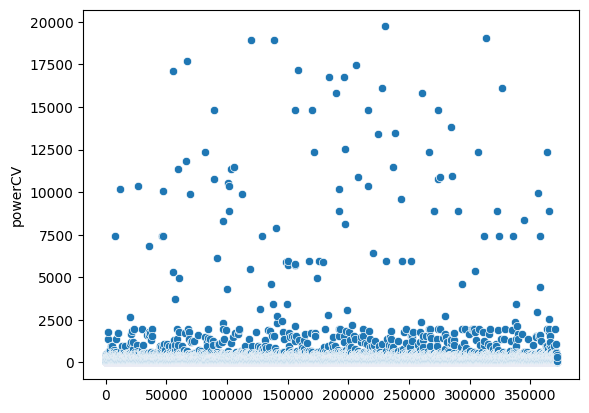

In [20]:
sns.scatterplot(df['powerCV'])


### Tras buscar en internet he visto que los coches pueden tener como minimo 50hp (en el caso de los coches modernos por ser electricos y en los antiguos por la potencia que tenian) y el maximo es 2000 como caso extremo

### Entonces, voy a poner a nulo los valores que no se encuentren entre estos valores

In [21]:
df['powerCV'].isna().sum()

0

In [22]:
df['powerCV'] = df['powerCV'].map(lambda x: x if 50 <= x <= 2000 else np.nan)

In [23]:
df['powerCV'].isna().sum()

51592

<Axes: xlabel='powerCV', ylabel='Count'>

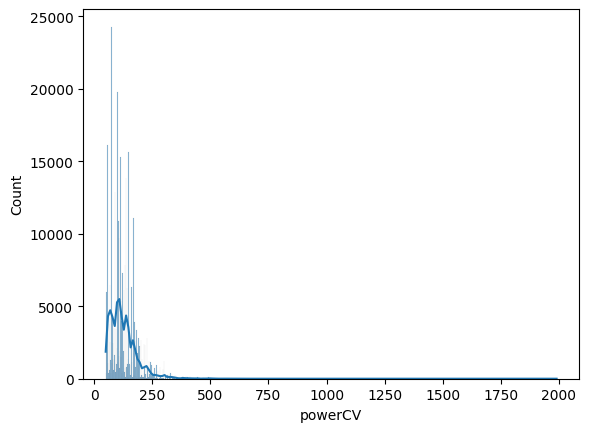

In [24]:
sns.histplot(df['powerCV'], kde=True)

In [25]:
pd.DataFrame({'media': df['powerCV'].mean(), 'mediana': df['powerCV'].median()}, index=[0])

,media,mediana
0,127.804246,114.0


### (trataremos los nulos posteriormente)

<hr>

### Vemos como llevamos nuestras variables numericas

In [26]:
df_numericas = df.select_dtypes(np.number)
df_numericas.sample(2)

,price,powerCV,kilometer,monthOfRegistration,postalCode
355275,0,100.0,150000,1,59505
161630,1755,100.0,150000,8,97753


In [27]:
df_numericas.isna().sum()

price                      0
powerCV                51592
kilometer                  0
monthOfRegistration        0
postalCode                 0
dtype: int64

### Vemos como llevamos nuestras variables categoricas

In [28]:
df_cate = df.select_dtypes('O')
df_cate.sample(2)

,dateCrawled,name,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
151207,2016-03-20 10:55:10,Mercedes_Benz_ML_320_CDI_4Matic_7G_TRONIC__SUV,private,offer,control,suv,Moderno,automatic,m_klasse,diesel,mercedes_benz,no,2016-03-20 00:00:00,2016-03-24 01:16:25
331349,2016-04-04 19:45:04,Ranult_Meagane_Scenic_1.6,private,offer,test,bus,Siglo XX,manually,megane,petrol,renault,no,2016-04-04 00:00:00,2016-04-04 19:45:04


In [29]:
df_cate.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
abtest                     0
vehicleType           133763
yearOfRegistration         0
gearbox                20209
model                  20484
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
lastSeen                   0
dtype: int64

### Vamos a ver que datos tenemos en las categorias nulas. Comenzamos por ```vehicleType```

#### (vemos que no tenemos ningun dato que predomine, por lo que no podemos imputar los valores nulos con un valor predominante)

In [30]:
df['vehicleType'].isna().sum()

133763

In [31]:
df['vehicleType'].value_counts(normalize=True)

vehicleType
small car      0.336565
combi          0.284164
bus            0.127023
convertible    0.096307
coupe          0.079967
suv            0.061856
other          0.014119
Name: proportion, dtype: float64

In [32]:
df_vehicleType_na = df[df['vehicleType'].isna()]

In [33]:
df_vehicleType_na.sample(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
340905,2016-03-10 20:49:49,Citroën_Xantia_1.6i_X,private,offer,950,control,NaN,Siglo XX,manually,87.0,andere,150000,9,petrol,citroen,no,2016-03-10 00:00:00,57080,2016-04-07 05:46:19
25176,2016-03-16 19:43:33,Opel_Vectra_1.8,private,offer,650,test,NaN,Moderno,automatic,123.0,vectra,150000,4,petrol,opel,yes,2016-03-16 00:00:00,42119,2016-03-20 20:18:06


### vemos las 10 modelos a los que mas modelo de vehiculo les faltan

<Axes: xlabel='model', ylabel='count'>

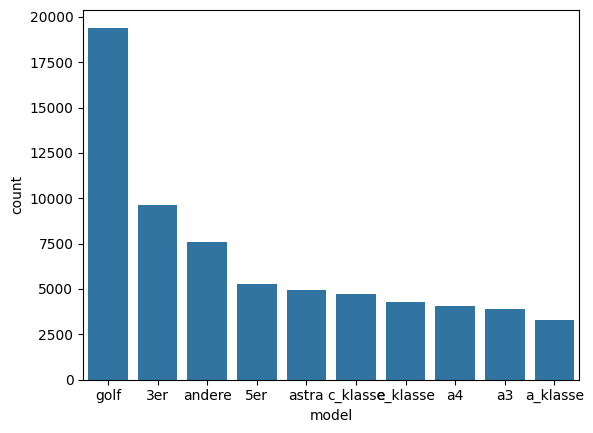

In [34]:
sns.barplot(df_vehicleType_na['model'].value_counts()[:10])

### (vemos que es golf con diferencia)

### Vemos que tenemos en ```gearbox```

#### aqui si que tenemos una clara dominancia por parte de 'manually'

In [35]:
df['gearbox'].value_counts(normalize=True)

gearbox
manually     0.78053
automatic    0.21947
Name: proportion, dtype: float64

### Vemos ```model```

#### (aqui no tenemos ninguna predominante)

In [36]:
df['model'].value_counts(normalize=True)

model
golf               0.085660
andere             0.075202
3er                0.058589
polo               0.037295
corsa              0.035816
                     ...   
serie_2            0.000023
rangerover         0.000017
serie_3            0.000011
serie_1            0.000006
discovery_sport    0.000003
Name: proportion, Length: 251, dtype: float64

### Vemos ```notRepairedDamage```

#### (vemos que tenemos predominancia por parte de 'no' con un casi 88%)

In [37]:
df['notRepairedDamage'].value_counts(normalize=True)

notRepairedDamage
no     0.878834
yes    0.121166
Name: proportion, dtype: float64

### Vemos ```fuelType```

#### (vemos predominancia por parte de petrol con un 66%)

In [38]:
df['fuelType'].value_counts(normalize=True)

fuelType
petrol     0.662020
diesel     0.318642
lpg        0.015905
cng        0.001689
hybrid     0.000822
other      0.000615
electro    0.000308
Name: proportion, dtype: float64

<hr>

<h2 style='color: blue; font-weight: bold'>Procedemos a la imputación de los nulos mediante los métodos 'Iterative' y 'KNN' y veremos cual nos altera menos los datos mediantes .describe()</h2>

In [39]:
df.isna().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
powerCV                 51592
model                   20484
kilometer                   0
monthOfRegistration         0
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
postalCode                  0
lastSeen                    0
dtype: int64

In [40]:
def porcentaje_nulos(df):
    # Calcular el porcentaje de valores nulos por columna
    porcentaje = df.isnull().mean() * 100
    # Filtrar y ordenar las columnas que tienen nulos
    return porcentaje[porcentaje > 0].sort_values(ascending=False)

In [41]:
porcentaje_nulos(df)

vehicleType          36.003865
notRepairedDamage    19.395786
powerCV              13.886586
fuelType              8.986230
model                 5.513507
gearbox               5.439487
dtype: float64

<hr>

## Procedemos a la imputacion de NULOS.

#### Comenzamos por ```VehicleType```

In [42]:
df['vehicleType'].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

### como no sabemos los valores y no hay ninguno predominante, lo rellenamos con 'unknow'

In [43]:
df['vehicleType'] = df['vehicleType'].fillna('unknown')

### Ahora ```notRepairedDamage```

#### (como en esta ocasion solo tenemos dos valores y uno predomina con casi un 88%, voy a rellenar lso restantes con la moda 'no' con un 88% de probabilidades y el otro 12% con 'yes' para continuar con la distribucion de los datos)

In [44]:
df['notRepairedDamage'] = df['notRepairedDamage'].apply(lambda x: np.random.choice(['no','yes'], p=[0.88, 0.12]) if pd.isnull(x) else x)


### Ahora ```fuelType```

### aqui aunque tenemos un valor predominante, al tener mas de 2 valores, no voy a imputar los nulos mediante probabilidad. Por lo que utilizaré 'unknown'.

In [45]:
df['fuelType'] = df['fuelType'].fillna('unknown')

### Ahora ```model```

### aqui aunque tenemos un valor predominante, al tener mas de 2 valores, no voy a imputar los nulos mediante probabilidad. Por lo que utilizaré 'unknown'.

In [46]:
df['model'] = df['model'].fillna('unknown')

### Ahora ```gearbox```

#### (como en esta ocasion solo tenemos dos valores y uno predomina con casi un 79%, voy a rellenar lso restantes con la moda 'manually' con un 79% de probabilidades y el otro 21% con 'yes' para continuar con la distribucion de los datos)

In [47]:
df['gearbox'] = df['gearbox'].apply(lambda x: np.random.choice(['manually','automatic'], p=[0.79, 0.21]) if pd.isnull(x) else x)


In [48]:
porcentaje_nulos(df)

powerCV    13.886586
dtype: float64